Solución de ejercicio de Kmeans utilizando scikitlearn, python y COLAB

En primer lugar instalamos la librería scikit-learn

In [0]:
!pip install scikit-learn

Luego importamos las librerías necesarias para resolver el ejercicio

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
%matplotlib inline

Cargamos en archivo con los datos a una variable y comprobamos sus dimensiones

In [0]:
X = np.loadtxt("kmeansdata.txt", dtype=np.float32, )
X.shape

(560, 4)

Aplicamos K-means a los datos de entrada para 10 casos de cluster (entre 2 y 11) para luego analizar cuál es el número óptimo de clusters.

In [0]:
Nc = range(2, 11)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

Una manera de analizar cuál es el número óptimo es graficando la variable "score" en función de la cantidad de clusters y luego analizar el "punto de codo (elbow point)". Aquí podemos tener una primera intuición de que el número óptimo de clusters es para N = 4.

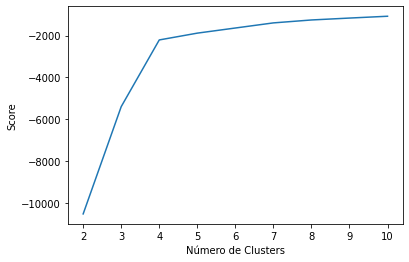

In [0]:
plt.plot(Nc,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.show()

Finalmente, volvemos a calcular Kmeans para los 10 casos pero esta vez evaluamos el valor de Davies-Bouldin y Silhouette en cada iteración. Mientras hacemos esto guardamos el caso en el cual el número de Silhouette sea mayor.

In [0]:
max_sil = -1
cluster_final = 0
for n_clusters in Nc:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    davies_bs_avg = davies_bouldin_score(X, cluster_labels)
    silhouette_avg = silhouette_score(X, cluster_labels)

    if silhouette_avg > max_sil:
      max_sil = silhouette_avg
      cluster_final = n_clusters
      
    print("Para el n_clusters =", n_clusters, "El valor de silhouette_score es :", silhouette_avg, " y el de davies_bouldin es :", davies_bs_avg)


Para el n_clusters = 2 El valor de silhouette_score es : 0.47062117  y el de davies_bouldin es : 0.9985163487333623
Para el n_clusters = 3 El valor de silhouette_score es : 0.5613666  y el de davies_bouldin es : 0.6466187416484912
Para el n_clusters = 4 El valor de silhouette_score es : 0.6625711  y el de davies_bouldin es : 0.45082504823606695
Para el n_clusters = 5 El valor de silhouette_score es : 0.53050965  y el de davies_bouldin es : 0.7052289641068482
Para el n_clusters = 6 El valor de silhouette_score es : 0.44333482  y el de davies_bouldin es : 0.8680858390271018
Para el n_clusters = 7 El valor de silhouette_score es : 0.38086733  y el de davies_bouldin es : 0.9725212085893357
Para el n_clusters = 8 El valor de silhouette_score es : 0.34016845  y el de davies_bouldin es : 1.060905378795482
Para el n_clusters = 9 El valor de silhouette_score es : 0.31052208  y el de davies_bouldin es : 1.1146680585751116
Para el n_clusters = 10 El valor de silhouette_score es : 0.29573083  y el

Con el valor óptimo de Silhouette informamos cuál es el número ópimo de clusters y la ubicación de los centros.

In [0]:
kmeans = KMeans(n_clusters=cluster_final).fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

print("El número final de clusters es",cluster_final)
centroids

El número final de clusters es 4


array([[-3.035002 ,  2.6056266, -2.910405 ,  2.7347767],
       [ 2.8035884,  2.7858958,  2.7601883,  2.8835957],
       [-2.8408976, -2.877892 , -2.9607062, -2.873948 ],
       [ 2.9219804, -2.7938664,  2.838122 , -2.924061 ]], dtype=float32)